# 从零实现 K-means 

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1.数据准备

In [40]:
from sklearn.datasets import make_blobs

# 生成一些样本数据
X, _ = make_blobs(n_samples=100, centers=3, cluster_std=0.60, random_state=0)

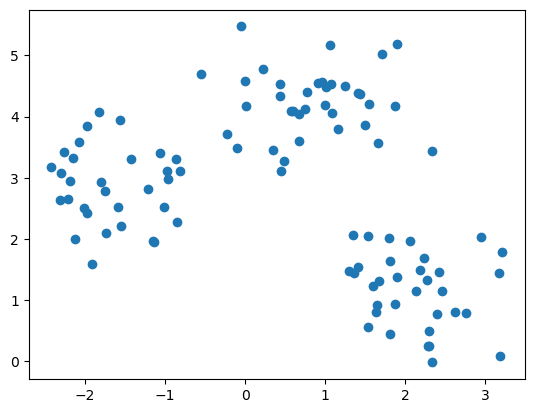

In [41]:
plt.scatter(*X.T)
plt.show()

## 2.从零实现

In [42]:
cluster_centers = 3     # 聚类中心数量

In [43]:
centers = X[np.random.choice(range(X.shape[0]), size=3)]

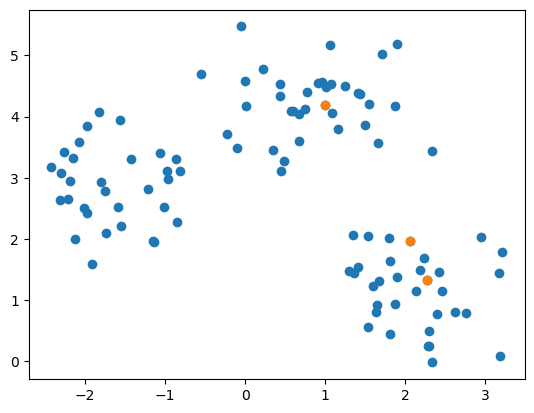

In [44]:
plt.scatter(*X.T)
plt.scatter(*centers.T)
plt.show()

In [45]:
def calc_distance(X, centers):
    return np.array([((X - center) ** 2).sum(axis=1) for center in centers]).T

In [46]:
cls = calc_distance(X, centers).argmin(axis=1)

In [47]:
init_cls = [X[cls==i] for i in range(cluster_centers)]

In [48]:
def calc_new_centers(init_cls):
    return np.array([cl.mean(axis=0) for cl in init_cls])

In [49]:
centers = calc_new_centers(init_cls)

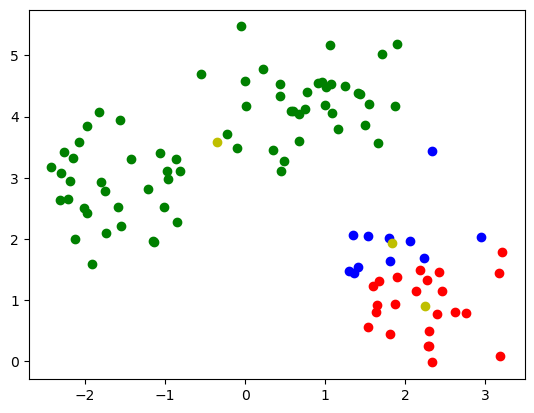

In [50]:
for i, color in zip(range(cluster_centers), ['r', 'g', 'b']):
    plt.scatter(*init_cls[i].T, c=color)
plt.scatter(*centers.T, c='y')
plt.show()

In [51]:
centers = X[np.random.choice(range(X.shape[0]), size=3)]
distance = calc_distance(X, centers).argmin(axis=1)
cls = [X[distance==i] for i in range(cluster_centers)]
centers = calc_new_centers(cls)
while True:
    _distance = calc_distance(X, centers).argmin(axis=1)
    if np.all(_distance==distance):
        break
    else:
        distance = _distance
    cls = [X[distance==i] for i in range(cluster_centers)] 
    centers = calc_new_centers(cls)

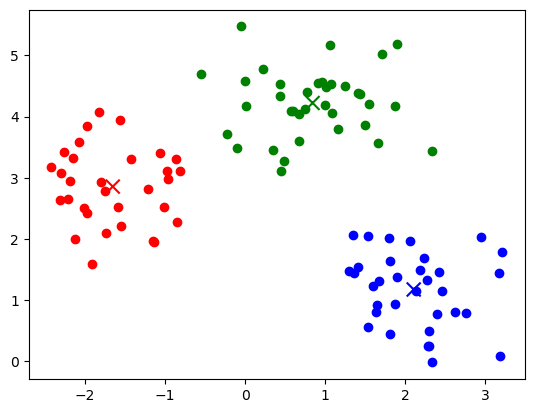

In [52]:
for i, color in zip(range(cluster_centers), ['r', 'g', 'b']):
    plt.scatter(*cls[i].T, c=color)
plt.scatter(*centers.T, c=['r', 'g', 'b'], marker='x', s=100)
plt.show()

In [53]:
def kmeans(X, cluster_centers):
    centers = X[np.random.choice(range(X.shape[0]), size=cluster_centers)]
    distance = calc_distance(X, centers).argmin(axis=1)
    cls = [X[distance==i] for i in range(cluster_centers)]
    centers = calc_new_centers(cls)
    for i in range(1000):
        _distance = calc_distance(X, centers).argmin(axis=1)
        if np.all(_distance==distance):
            break
        else:
            distance = _distance
        cls = [X[distance==i] for i in range(cluster_centers)] 
        centers = calc_new_centers(cls)
    return cls, centers

In [55]:
Js = []
models = []
for i in range(3):
    clss, centers = kmeans(X, 3)
    dis = [np.sqrt((cl - center) ** 2).sum(axis=1) for cl, center in zip(clss, centers)]
    Js.append(np.array([d.mean() * len(d) / len(X) for d in dis]).sum())
    models.append([clss, centers])

In [56]:
Js

[0.9592016363665061, 0.9592016363665061, 1.5743159649641019]

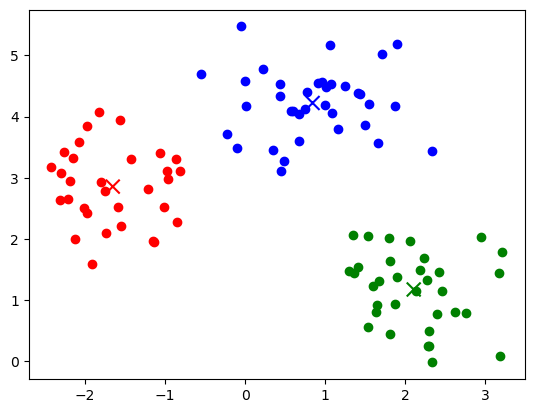

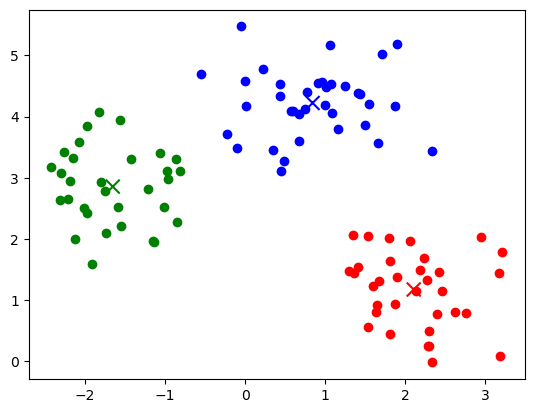

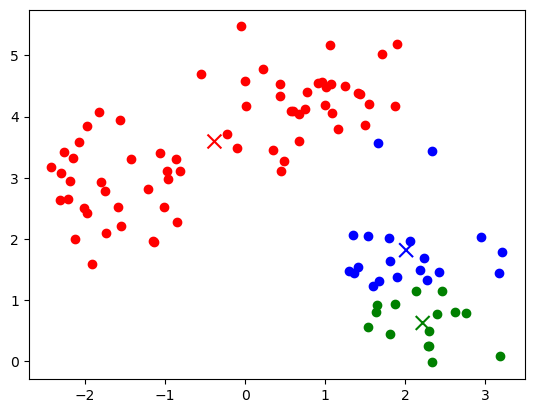

In [57]:
for cls, centers in models:
    try:
        for i, color in zip(range(cluster_centers), ['r', 'g', 'b']):
            plt.scatter(*cls[i].T, c=color)
        plt.scatter(*centers.T, c=['r', 'g', 'b'], marker='x', s=100)
        plt.show()
    except Exception as e:
        pass